<a href="https://colab.research.google.com/github/iampawanpoojary/ikea_image_classifier/blob/master/ikea_find_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##will usee tensorflow as the backend for keras
##only run once
!pip install pillow
!KERAS_BACKEND=tensorflow python -c "from keras import backend"

Using TensorFlow backend.


In [0]:
# %%bigquery --project yourprojectid df
# SELECT 
#   COUNT(*) as total_rows
# FROM `bigquery-public-data.samples.gsod`


In [0]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [0]:
#find a better way to connect my data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#check karega if all working
import os
os.chdir("/content/drive/")
!ls

'My Drive'


In [0]:
# will use 150, 150 , 3 dimensions
img_width, img_height = 150, 150

#change this to big query database later
train_data_dir = 'My Drive/Colab Notebooks/data/train'
validation_data_dir = 'My Drive/Colab Notebooks/data/validation'

In [0]:
#will display the daataaa
def dsiplay_ikea_images(typeimg,no_of_img):
  img_names = []
  imgs = []
  ct = 0
  
  limit = no_of_img #kitna images to display?
  for image_file in sorted(glob.glob('My Drive/Colab Notebooks/data/train/'+typeimg+'/*.jpg')):
      img = mpimg.imread(image_file)
      img_name = image_file.split('/')[-1]

      plt.subplot(1, 2, 1)
      plt.imshow(img, cmap="gray")
      plt.show()
      if ct == limit:
        break
      ct=ct+1
  return 0
    

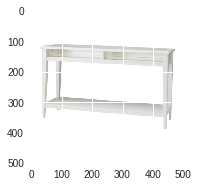

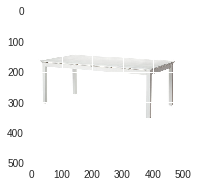

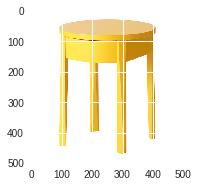

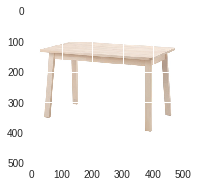

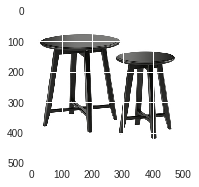

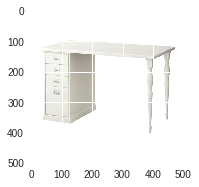

0

In [0]:
dsiplay_ikea_images('table',5)

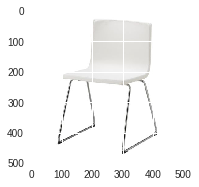

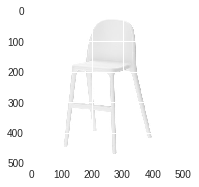

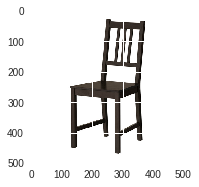

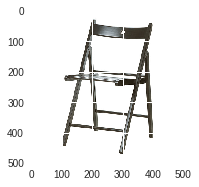

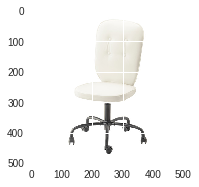

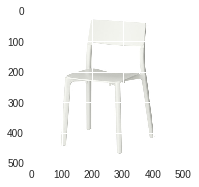

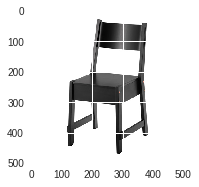

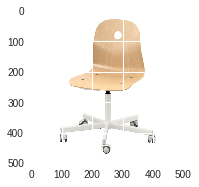

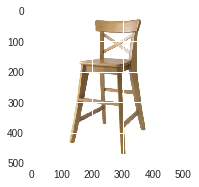

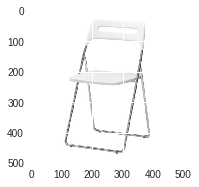

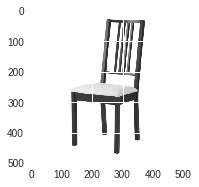

0

In [0]:
dsiplay_ikea_images('chair',10)

In [0]:
# rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# MAGIC!!!
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 203 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [0]:
t_class = train_generator.class_indices
t_class
##dispplay some images later 

{'chair': 0, 'table': 1}

In [0]:
#model

In [0]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
#try adam optimizer later

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


### Training

In [0]:
nb_epoch = 30
nb_train_samples = 203
nb_validation_samples = 20

In [0]:
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=12, epochs=30, validation_steps=20)`
  


Epoch 1/30
12/12 [==============================] - 4s 301ms/step - loss: 1.1499 - acc: 0.4688 - val_loss: 1.3538 - val_acc: 0.5000
Epoch 2/30
12/12 [==============================] - 3s 235ms/step - loss: 0.7048 - acc: 0.6663 - val_loss: 0.4881 - val_acc: 0.7500
Epoch 3/30
12/12 [==============================] - 3s 229ms/step - loss: 0.4946 - acc: 0.8077 - val_loss: 0.3588 - val_acc: 0.9000
Epoch 4/30
12/12 [==============================] - 3s 234ms/step - loss: 0.6379 - acc: 0.7386 - val_loss: 0.3771 - val_acc: 0.8000
Epoch 5/30
12/12 [==============================] - 3s 230ms/step - loss: 0.3905 - acc: 0.8726 - val_loss: 0.4128 - val_acc: 0.8500
Epoch 6/30
12/12 [==============================] - 3s 232ms/step - loss: 0.3331 - acc: 0.8934 - val_loss: 0.4040 - val_acc: 0.7500
Epoch 7/30
12/12 [==============================] - 3s 232ms/step - loss: 0.3239 - acc: 0.8734 - val_loss: 0.2845 - val_acc: 0.8500
Epoch 8/30
12/12 [==============================] - 3s 230ms/step - loss: 0.

In [0]:
#model.save_weights('My Drive/Colab Notebooks/test_model.h5')

In [0]:
model.load_weights('My Drive/Colab Notebooks/test_model.h5')

Computing loss and accuracy :

In [0]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.16706685721874237, 0.949999988079071]

Data Aug


In [0]:
train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True)  # randomly flip the images

# same code 
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 203 images belonging to 2 classes.


In [0]:
model.fit_generator(
        train_generator_augmented,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=6, epochs=30, validation_steps=20)`
  


6/6 [==============================] - 4s 718ms/step - loss: 0.5031 - acc: 0.8698 - val_loss: 0.1669 - val_acc: 0.9000
Epoch 2/30
6/6 [==============================] - 3s 552ms/step - loss: 0.3182 - acc: 0.9067 - val_loss: 0.1892 - val_acc: 0.9500
Epoch 3/30
6/6 [==============================] - 3s 554ms/step - loss: 0.2787 - acc: 0.9014 - val_loss: 0.2032 - val_acc: 0.9500
Epoch 4/30
6/6 [==============================] - 3s 551ms/step - loss: 0.2470 - acc: 0.8993 - val_loss: 0.1608 - val_acc: 0.9500
Epoch 5/30
6/6 [==============================] - 3s 554ms/step - loss: 0.2615 - acc: 0.9067 - val_loss: 0.2254 - val_acc: 0.9000
Epoch 6/30
6/6 [==============================] - 3s 550ms/step - loss: 0.4149 - acc: 0.8631 - val_loss: 0.1534 - val_acc: 0.9500
Epoch 7/30
6/6 [==============================] - 3s 551ms/step - loss: 0.2122 - acc: 0.9258 - val_loss: 0.1034 - val_acc: 0.9500
Epoch 8/30
6/6 [==============================] - 3s 547ms/step - loss: 0.2176 - acc: 0.9427 - val_lo

In [0]:
model.save_weights('My Drive/Colab Notebooks/augmented_model.h5')

In [0]:
model.load_weights('My Drive/Colab Notebooks/augmented_model.h5')

### Evaluating on validation set

In [0]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.1365693360567093, 0.949999988079071]

In [0]:
classes = train_generator.class_indices    


In [0]:
classes

{'chair': 0, 'table': 1}

In [0]:
x = np.random.randint(0,10,(150,150,3))
x.shape
x = np.expand_dims(x, axis=0)

In [0]:
model.predict(x)

array([[0.29921326]], dtype=float32)

In [0]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('My Drive/Colab Notebooks/data/validation/chair/902.535.35.jpg')

#image = load('My Drive/Colab Notebooks/data/train/table/002.382.00.jpg')
prediction = model.predict(image)
#print(prediction)
i = 1

for things in prediction:  
    if(things > 0.80):
        print('%d.It is a table'%(i))
    else:
        print('%d.its a chair'%(i))
        print(things)
    i = i + 1
    
classes = model.predict_classes(image, batch_size=10)

# class which img belong to
print (classes)
print (classes[0])
print (classes[0][0])

1.its a chair
[0.01568537]
[[0]]
[0]
0


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
